In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


In [2]:
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras.layers import Activation,BatchNormalization,Flatten,MaxPooling2D,ZeroPadding2D
from tensorflow.keras.layers import Input,Conv2D,Conv2DTranspose,Dense,Reshape,Dropout,UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

from scipy import misc
import numpy as np
import os
import numpy as np


In [20]:
TEST_DATASET= ["/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_0.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_1.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_2.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_3.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_4.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_5.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_6.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_7.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_8.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_9.json",
               "/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/all_batch_10.json",
              
              ]
#TEST_DATASET= ["/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_0.json"]


In [21]:
from getData import get_generator
damaged_generator = get_generator(TEST_DATASET,200,128,damaged=False)
#non_damaged_generator = get_generator(TEST_DATASET,10,128,damaged=False,)

In [22]:
len(damaged_generator)

17184

In [7]:
img = damaged_generator.__getitem__(5)

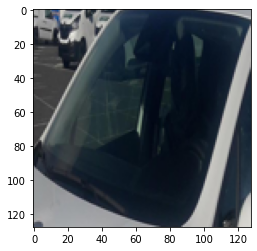

In [19]:
plt.imshow((img[10]))

In [44]:
import PIL

i = PIL.Image.fromarray(np.array(img[10]*255,dtype='uint8'))

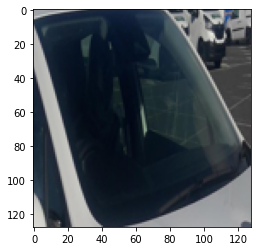

In [48]:
plt.imshow(i.transpose(PIL.Image.FLIP_LEFT_RIGHT))

In [62]:
np.random.random()

0.9860374095036555

In [24]:
from build_Unet import Encoder,Decoder,VariatonalAutoEncoder

In [25]:
encoder = Encoder(128)
decoder = Decoder()
vae = VariatonalAutoEncoder(encoder,decoder,100)

In [26]:
vae.load_weights("/home/ubuntu/trainings/damages_classification/2021-06-17-Wnet/UnetVariational/ckpt300")

In [27]:
res = vae(img)

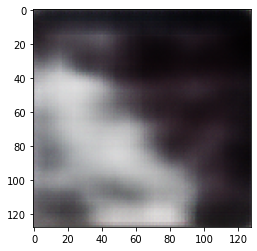

In [28]:
plt.imshow(res[4])

In [29]:
np.random.normal((1,1024))

array([   2.22709106, 1023.80291858])

In [32]:
_,_,enco = vae.encoder(img)

In [85]:
enco.shape


TensorShape([128, 1024])

In [34]:
enco[0]

<tf.Tensor: shape=(1024,), dtype=float32, numpy=
array([-1.3989674, -0.2554439,  0.8470825, ..., -0.4625351, -1.2591918,
       -1.7327054], dtype=float32)>


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



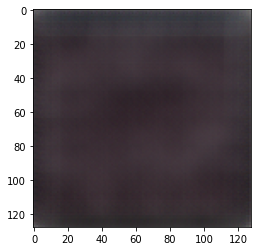

In [30]:
e = np.random.normal(loc=0.0, scale=1.0, size=(1,1024))
res_gen =vae.decoder(e)
plt.imshow(res_gen[0])

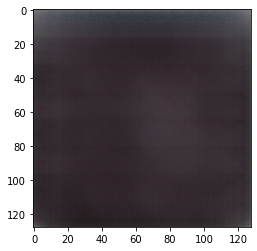

In [88]:
e = np.random.normal(loc=0.0, scale=1.0, size=(1,1024))
res_gen =vae.decoder(e)
plt.imshow(res_gen[0])

In [68]:
res_gen

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.48181072, 0.48341185, 0.48877057],
         [0.45266452, 0.45095465, 0.4585027 ],
         [0.47511733, 0.4579207 , 0.47741738],
         ...,
         [0.47145286, 0.49366418, 0.48362467],
         [0.4702972 , 0.48988584, 0.47171608],
         [0.50094694, 0.4924566 , 0.4992141 ]],

        [[0.41753784, 0.4058569 , 0.43745166],
         [0.41120362, 0.41415706, 0.40720624],
         [0.39179388, 0.36412498, 0.4054736 ],
         ...,
         [0.4265667 , 0.43423837, 0.4504503 ],
         [0.44436488, 0.43923748, 0.4345719 ],
         [0.47190064, 0.45193112, 0.46368536]],

        [[0.41741407, 0.4051118 , 0.4427966 ],
         [0.3496666 , 0.37680164, 0.38560674],
         [0.4161778 , 0.39278013, 0.40969852],
         ...,
         [0.40233365, 0.44276032, 0.44078082],
         [0.43301183, 0.43165806, 0.42987   ],
         [0.44560403, 0.46181932, 0.47129595]],

        ...,

        [[0.36083627, 0.32812673, 